In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import orders_products_merged.pkl.csv
file_path = r"D:\career Foundary\Data_immersion\4_python_projects\Instacart Basket Analysis"

In [5]:
df_ord_prod_update_version =  pd.read_pickle(os.path.join(file_path, '02 Data','Prepared Data', 'df_orders_products_merged_updated_version.pkl'))

In [6]:
df_ord_prod_update_version.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,max_order,loyalty_flag,average price,spending_flag,median_prior_orders,orders frequency,Median,order_frequency_flag,median,median_orders
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,10,New customer,6.367797,Low spender,20.5,20.5,20.5,Non-frequent customer,20.5,20.5
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,10,New customer,6.367797,Low spender,20.5,20.5,20.5,Non-frequent customer,20.5,20.5
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,10,New customer,6.367797,Low spender,20.5,20.5,20.5,Non-frequent customer,20.5,20.5
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,10,New customer,6.367797,Low spender,20.5,20.5,20.5,Non-frequent customer,20.5,20.5
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,10,New customer,6.367797,Low spender,20.5,20.5,20.5,Non-frequent customer,20.5,20.5


### Creating Bar Charts

<AxesSubplot:>

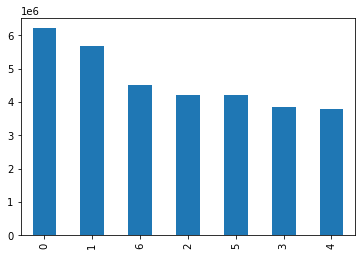

In [7]:
df_ord_prod_update_version["orders_day_of_week"].value_counts().plot.bar()

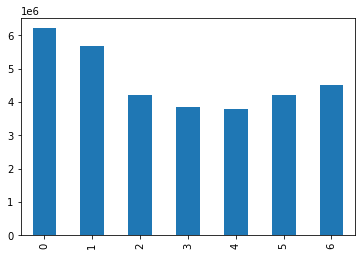

In [8]:
bar = df_ord_prod_update_version["orders_day_of_week"].value_counts().sort_index().plot.bar()

In [9]:
df_ord_prod_update_version["orders_day_of_week"].value_counts()

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: orders_day_of_week, dtype: int64

In [10]:
df_ord_prod_update_version["orders_day_of_week"].value_counts().sort_index()

0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: orders_day_of_week, dtype: int64

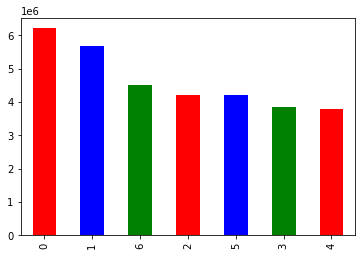

In [11]:
bar = df_ord_prod_update_version["orders_day_of_week"].value_counts().plot.bar(color = ["red","Blue", "green"])

### Exporting Charts

In [12]:
# To save your colors on the bar chart above, you can use

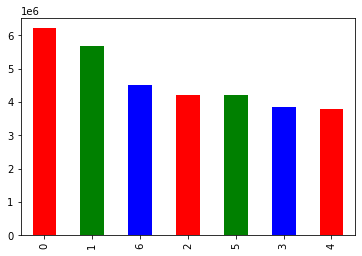

In [13]:
bar = df_ord_prod_update_version['orders_day_of_week'].value_counts().plot.bar(color =['red', 'green', 'blue'])

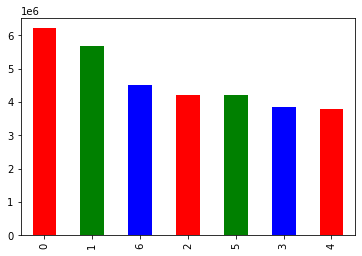

In [14]:
bar.figure

In [15]:
bar.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'Bar_chart_orders_dow.png'))

### Creating Histograms and Scatterplots

In [16]:
# histograms are used to show the density of a continuous variable—the distribution of observations per their occurrence in a data set
# That’s why bar charts are good for categorical data and histograms are more appropriate for continuous data.

<AxesSubplot:ylabel='Frequency'>

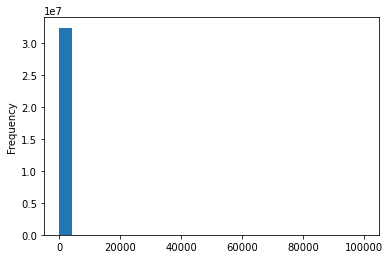

In [17]:
df_ord_prod_update_version['prices'].plot.hist(bins = 25)

In [18]:
df_ord_prod_update_version['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [19]:
df_ord_prod_update_version['prices'].mean()

11.981143923057092

In [20]:
df_ord_prod_update_version['prices'].median()

7.4

In [21]:
df_ord_prod_update_version['prices'].max()

99999.0

In [22]:
# While the mean and median are between 7 and 12 (relatively realistic),the max value yields a strange result. How could an item cost $99,999.00? 
# This must be the result of data corruption or some kind of special value within the data. 
# This is also what’s breaking your histogram having most values between 7 and 12 (see the median and mean again), 
# but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. 
# And this second bar is so tiny that you can’t even see it on the chart.Normally, you’d use scatterplots to investigate the relationship between two variables. 
# However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.

<AxesSubplot:xlabel='prices', ylabel='prices'>

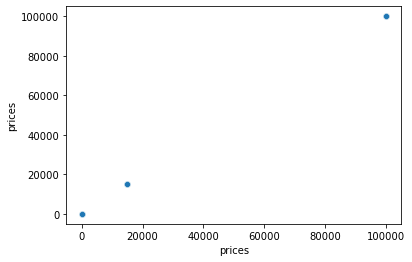

In [23]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ord_prod_update_version)

In [24]:
df_ord_prod_update_version.loc[df_ord_prod_update_version['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,max_order,loyalty_flag,average price,spending_flag,median_prior_orders,orders frequency,Median,order_frequency_flag,median,median_orders
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,40,Regular customer,108.648299,High spender,5.0,5.0,5.0,Frequent customer,5.0,5.0
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,40,Regular customer,108.648299,High spender,5.0,5.0,5.0,Frequent customer,5.0,5.0
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,4,New customer,1154.792308,High spender,12.0,12.0,12.0,Regular customer,12.0,12.0
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,4,New customer,1154.792308,High spender,12.0,12.0,12.0,Regular customer,12.0,12.0
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,16,Regular customer,114.426619,High spender,23.0,23.0,23.0,Non-frequent customer,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,39,Regular customer,1106.743956,High spender,4.0,4.0,4.0,Frequent customer,4.0,4.0
29193269,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,39,Regular customer,1106.743956,High spender,4.0,4.0,4.0,Frequent customer,4.0,4.0
29193270,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,15,Regular customer,451.153540,High spender,5.0,5.0,5.0,Frequent customer,5.0,5.0
29193271,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,12,Regular customer,1178.381871,High spender,12.0,12.0,12.0,Regular customer,12.0,12.0


In [25]:
# This is a function from the NumPy library; it’s used to assign missing values. So we set the > 100 values to NAN

In [26]:
df_ord_prod_update_version.loc[df_ord_prod_update_version['prices'] >100, 'prices'] = np.nan

In [27]:
# check whether the replacement was successful by running a max-value check on your “prices” column.

In [28]:
df_ord_prod_update_version['prices'].max()

25.0

In [29]:
# Perfect. Logically, you know that a $25 grocery item is much more likely than a $14,900 item and especially a $99,999 item!.
# Now max value is less than 100 when compared to 99,999 value previously.

In [30]:
# let’s retry that histogram of your “prices” column again.

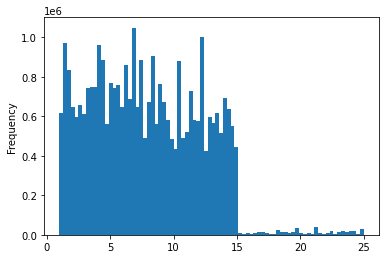

In [31]:
hist = df_ord_prod_update_version['prices'].plot.hist(bins = 80)

In [32]:
# most products are between $1 and $15, while a few are higher priced at $15 to $25. To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. 
# This will result in a histogram with more, thinner columns:

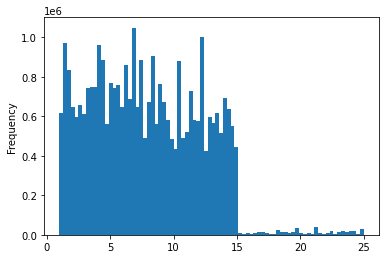

In [33]:
hist.figure

 ### export your histogram

In [34]:
hist.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'histogram_chart_orders_dow.png'))

# Creating Line Charts

In [35]:
# plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis.

In [36]:
#df = ords_prods_merge[:2000000]

### Sampling Data

In [37]:
# This method is used to create a subset that actually represents the entirety of your data by randomizing the rows.
# for instance an 80/20 or 70/30 split. By using the following

In [38]:
# Create a list holding true/false values to the test np. random.rand() <=0.7
np.random.seed(4)
Generated_sample = np.random.rand(len(df_ord_prod_update_version)) <= 0.7

In [39]:
# Where "seed" represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”)

In [40]:
Generated_sample

array([False,  True, False, ..., False,  True,  True])

In [41]:
#store 70% of the sample in the dataframe big
sample_big_70 = df_ord_prod_update_version[Generated_sample]

In [42]:
#store 70% of the sample in the dataframe small
sample_small_30 = df_ord_prod_update_version[~Generated_sample]

In [43]:
len(df_ord_prod_update_version)

32434212

In [44]:
len(sample_big_70) + len(sample_small_30)

32434212

In [45]:
# we can still increase the processing time by reducing the samples to only those columns necessary for the chart, 
# namely “prices” and “orders_day_of_week.”

In [46]:
df_of_both_column = sample_small_30[['orders_day_of_week','prices']]


In [47]:
# using this dateframe, create a line chart.

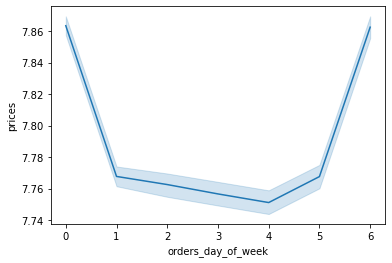

In [48]:
line = sns.lineplot(data = df_of_both_column, x = 'orders_day_of_week',y = 'prices')

In [49]:
df_4 = df_ord_prod_update_version[['orders_day_of_week','prices']]

In [51]:
line = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

MemoryError: Unable to allocate 247. MiB for an array with shape (32434212,) and data type int64

# EX 4.9

In [7]:
df_customer =  pd.read_csv(os.path.join(file_path, '02 Data','Original data', 'customers.csv'))

In [8]:
df_customer.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [10]:
df_customer.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [11]:
df_customer.max()

user_id           206209
Surnam            Zuniga
Gender              Male
STATE            Wyoming
Age                   81
date_joined     9/9/2019
n_dependants           3
fam_status        single
income            593901
dtype: object

In [ ]:
df_customer.median()